# Instalando pacote MetaTrader5 para Python
https://pypi.org/project/MetaTrader5/

In [1]:
# Instale a biblioteca MetaTrader5
# pip install MetaTrader5
from MetaTrader5 import *

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Terminal Metatrader 5 tem que estar aberto
# Conectar com terminal
MT5Initialize()
MT5WaitForTerminal()
print(MT5TerminalInfo())
print(MT5Version())

[2, 'XPMT5-Demo', '70357826']
[500, 2085, '13 Jun 2019']


In [4]:
# Baixando os dados de tick do dia
inicio = pd.to_datetime('today').replace(hour=0, minute=0, second=0, microsecond=0)
fim = pd.to_datetime('today')
print('Periodo selecionado de {} a {}'.format(inicio, fim))

Periodo selecionado de 2019-10-03 00:00:00 a 2019-10-03 23:31:26.760178


In [5]:
# Baixando dados de ticks básico
mini = MT5CopyTicksRange("WIN$N", inicio, fim, MT5_COPY_TICKS_ALL)
mini

(MT5Tick(time=datetime.datetime(2019, 10, 3, 6, 0, 31, 946000), bid=0.0, ask=0.0, last=101445.0, volume=10.0, flags=312),
 MT5Tick(time=datetime.datetime(2019, 10, 3, 6, 0, 31, 946000), bid=0.0, ask=0.0, last=101445.0, volume=48.0, flags=312),
 MT5Tick(time=datetime.datetime(2019, 10, 3, 6, 0, 31, 946000), bid=0.0, ask=0.0, last=101445.0, volume=2.0, flags=312),
 MT5Tick(time=datetime.datetime(2019, 10, 3, 6, 0, 31, 946000), bid=0.0, ask=0.0, last=101445.0, volume=10.0, flags=312),
 MT5Tick(time=datetime.datetime(2019, 10, 3, 6, 0, 31, 946000), bid=0.0, ask=0.0, last=101445.0, volume=1.0, flags=312),
 MT5Tick(time=datetime.datetime(2019, 10, 3, 6, 0, 31, 946000), bid=0.0, ask=0.0, last=101445.0, volume=1.0, flags=312),
 MT5Tick(time=datetime.datetime(2019, 10, 3, 6, 0, 31, 946000), bid=0.0, ask=0.0, last=101445.0, volume=1.0, flags=312),
 MT5Tick(time=datetime.datetime(2019, 10, 3, 6, 0, 31, 946000), bid=0.0, ask=0.0, last=101445.0, volume=1.0, flags=312),
 MT5Tick(time=datetime.dateti

In [6]:
# Baixando dados de Ticks para Pandas
# mini = pd.DataFrame(MT5CopyTicksFrom("WIN$N", inicio, 1000, MT5_COPY_TICKS_ALL))
mini = pd.DataFrame(MT5CopyTicksRange("WIN$N", inicio, fim, MT5_COPY_TICKS_ALL))

In [7]:
mini.columns = ['time','bid','ask','last','volume','flag']
mini.set_index('time', inplace=True)
len(mini)

2107430

In [8]:
mini.head()

,bid,ask,last,volume,flag
time,,,,,
2019-10-03 06:00:31.946,0.0,0.0,101445.0,10.0,312
2019-10-03 06:00:31.946,0.0,0.0,101445.0,48.0,312
2019-10-03 06:00:31.946,0.0,0.0,101445.0,2.0,312
2019-10-03 06:00:31.946,0.0,0.0,101445.0,10.0,312
2019-10-03 06:00:31.946,0.0,0.0,101445.0,1.0,312


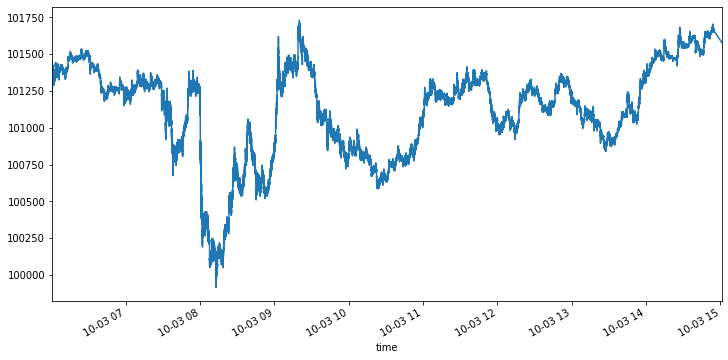

In [9]:
mini['last'].plot(figsize=(12,6))

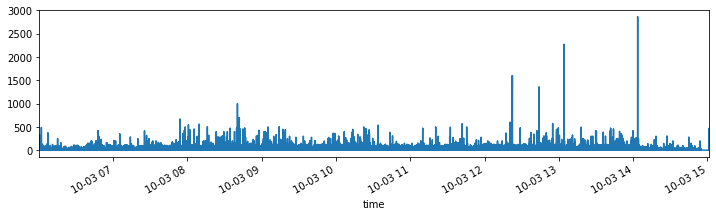

In [10]:
mini['volume'].plot(figsize=(12,3))

In [11]:
# Baixando dados de Ticks para Pandas
# mini_rates = pd.DataFrame(MT5CopyRatesFrom("WIN$N", MT5_TIMEFRAME_M1, inicio, 1000))
# mini_rates = pd.DataFrame(MT5CopyRatesFromPos("WIN$N", MT5_TIMEFRAME_M1, 0, 1000))
mini_rates = pd.DataFrame(MT5CopyRatesRange("WIN$N", MT5_TIMEFRAME_M1, inicio, fim))

In [12]:
mini_rates.columns = ['time','open','high','low','close','tick_volume','spread','real_volume']
mini_rates.set_index('time', inplace=True)
len(mini)

2107430

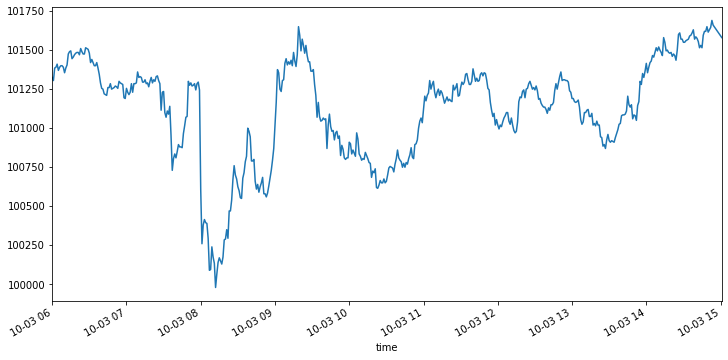

In [13]:
mini_rates['close'].plot(figsize=(12,6))

In [14]:
MT5Shutdown()

True